In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("./dataset/train_preprocessed.csv")
df_target = df.pop("CO2 Emissions(g/km)")
df_id = df.pop('Id')
df

,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders
0,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X,3.5,6.0
1,27.270000,30.760000,28.840000,CHEVO,PICKUP TRUCK - STANDARD,A6,E,5.3,NaN
2,1.700000,2.030000,NaN,BMV,SUBCOMPACT,M6,Z,4.4,NaN
3,15.337423,15.900000,NaN,KIO,SUV - SMALL,AS6,X,NaN,4.0
4,20.150000,6.000000,13.800000,BARUSU,MINICOMPACT,NaN,Z,3.0,6.0
...,...,...,...,...,...,...,...,...,...
137136,33.710000,7.698229,22.026432,BMV,SUBCOMPACT,AS8,Z,NaN,8.0
137137,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X,1.5,4.0
137138,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X,1.8,4.0
137139,11.480000,0.221408,6.400000,TOYOTI,COMPACT,NaN,X,1.8,4.0


In [37]:
mask = df.isnull().any(axis=1)

# Capture the rows with missing values
df_with_missing_values = df[mask]

# Drop the rows with missing values from the original DataFrame
df_no_missing_values = df.dropna()

In [38]:
df_with_missing_values

,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders
1,27.270000,30.760000,28.840000,CHEVO,PICKUP TRUCK - STANDARD,A6,E,5.3,NaN
2,1.700000,2.030000,NaN,BMV,SUBCOMPACT,M6,Z,4.4,NaN
3,15.337423,15.900000,NaN,KIO,SUV - SMALL,AS6,X,NaN,4.0
4,20.150000,6.000000,13.800000,BARUSU,MINICOMPACT,NaN,Z,3.0,6.0
5,42.228830,7.379336,26.547921,LECUS,COMPACT,NaN,Z,NaN,4.0
...,...,...,...,...,...,...,...,...,...
137132,12.400000,NaN,7.289832,GONDA,MID-SIZE,M6,X,3.5,6.0
137133,2.340000,15.454309,8.244465,CHEVO,SUV - SMALL,M6,X,NaN,6.0
137135,5.030000,14.360000,9.220000,KIO,SUV - SMALL,AS6,X,2.4,NaN
137136,33.710000,7.698229,22.026432,BMV,SUBCOMPACT,AS8,Z,NaN,8.0


In [39]:
df_no_missing_values

,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders
0,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X,3.5,6.0
6,7.520000,19.138279,12.750000,GONDA,FULL-SIZE,AV7,X,1.8,4.0
7,8.238689,2.060000,5.455537,LAND CRAWLER,SUV - SMALL,AS8,Z,2.0,4.0
11,19.010000,8.541911,14.306152,BMV,SUBCOMPACT,M6,Z,3.0,6.0
12,2.200000,5.300000,3.579098,TOYOTI,MINIVAN,AS6,X,2.0,4.0
...,...,...,...,...,...,...,...,...,...
137131,23.160000,16.830000,20.300000,NIRRAN,SPECIAL PURPOSE VEHICLE,AV,X,2.0,4.0
137134,17.750000,0.530000,10.000000,GONDA,MID-SIZE,M6,X,3.5,6.0
137137,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X,1.5,4.0
137138,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X,1.8,4.0


In [40]:
def detect_outliers_iqr(data, multiplier=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lwr_bound = q1 - (multiplier * IQR)
    upr_bound = q3 + (multiplier * IQR)
    mask = (data >= lwr_bound) & (data <= upr_bound)
    return mask


# Assuming df is your DataFrame
# Iterate over all columns
for column in df_no_missing_values.columns:
    # Check if column is numeric
    if np.issubdtype(df_no_missing_values[column].dtype, np.number):
        # Detect outliers
        mask = detect_outliers_iqr(df_no_missing_values[column])
        # Filter the column with the mask and overwrite it
        df_no_missing_values.loc[:, column] = df_no_missing_values[column][mask]

In [41]:
df_all = pd.concat([df_no_missing_values, df_with_missing_values])
df_all = pd.concat([df_all, df_target], axis=1)
df_all = df_all.sort_index()
df_all.insert(0, 'Id', df_id)
df_all

,Id,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,CO2 Emissions(g/km)
0,1,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X,3.5,6.0,306.0
1,2,27.270000,30.760000,28.840000,CHEVO,PICKUP TRUCK - STANDARD,A6,E,5.3,NaN,283.0
2,3,1.700000,2.030000,NaN,BMV,SUBCOMPACT,M6,Z,4.4,NaN,329.0
3,4,15.337423,15.900000,NaN,KIO,SUV - SMALL,AS6,X,NaN,4.0,270.0
4,5,20.150000,6.000000,13.800000,BARUSU,MINICOMPACT,NaN,Z,3.0,6.0,193.0
...,...,...,...,...,...,...,...,...,...,...,...
137136,137137,33.710000,7.698229,22.026432,BMV,SUBCOMPACT,AS8,Z,NaN,8.0,275.0
137137,137138,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X,1.5,4.0,166.0
137138,137139,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X,1.8,4.0,181.0
137139,137140,11.480000,0.221408,6.400000,TOYOTI,COMPACT,NaN,X,1.8,4.0,123.0


<Axes: >

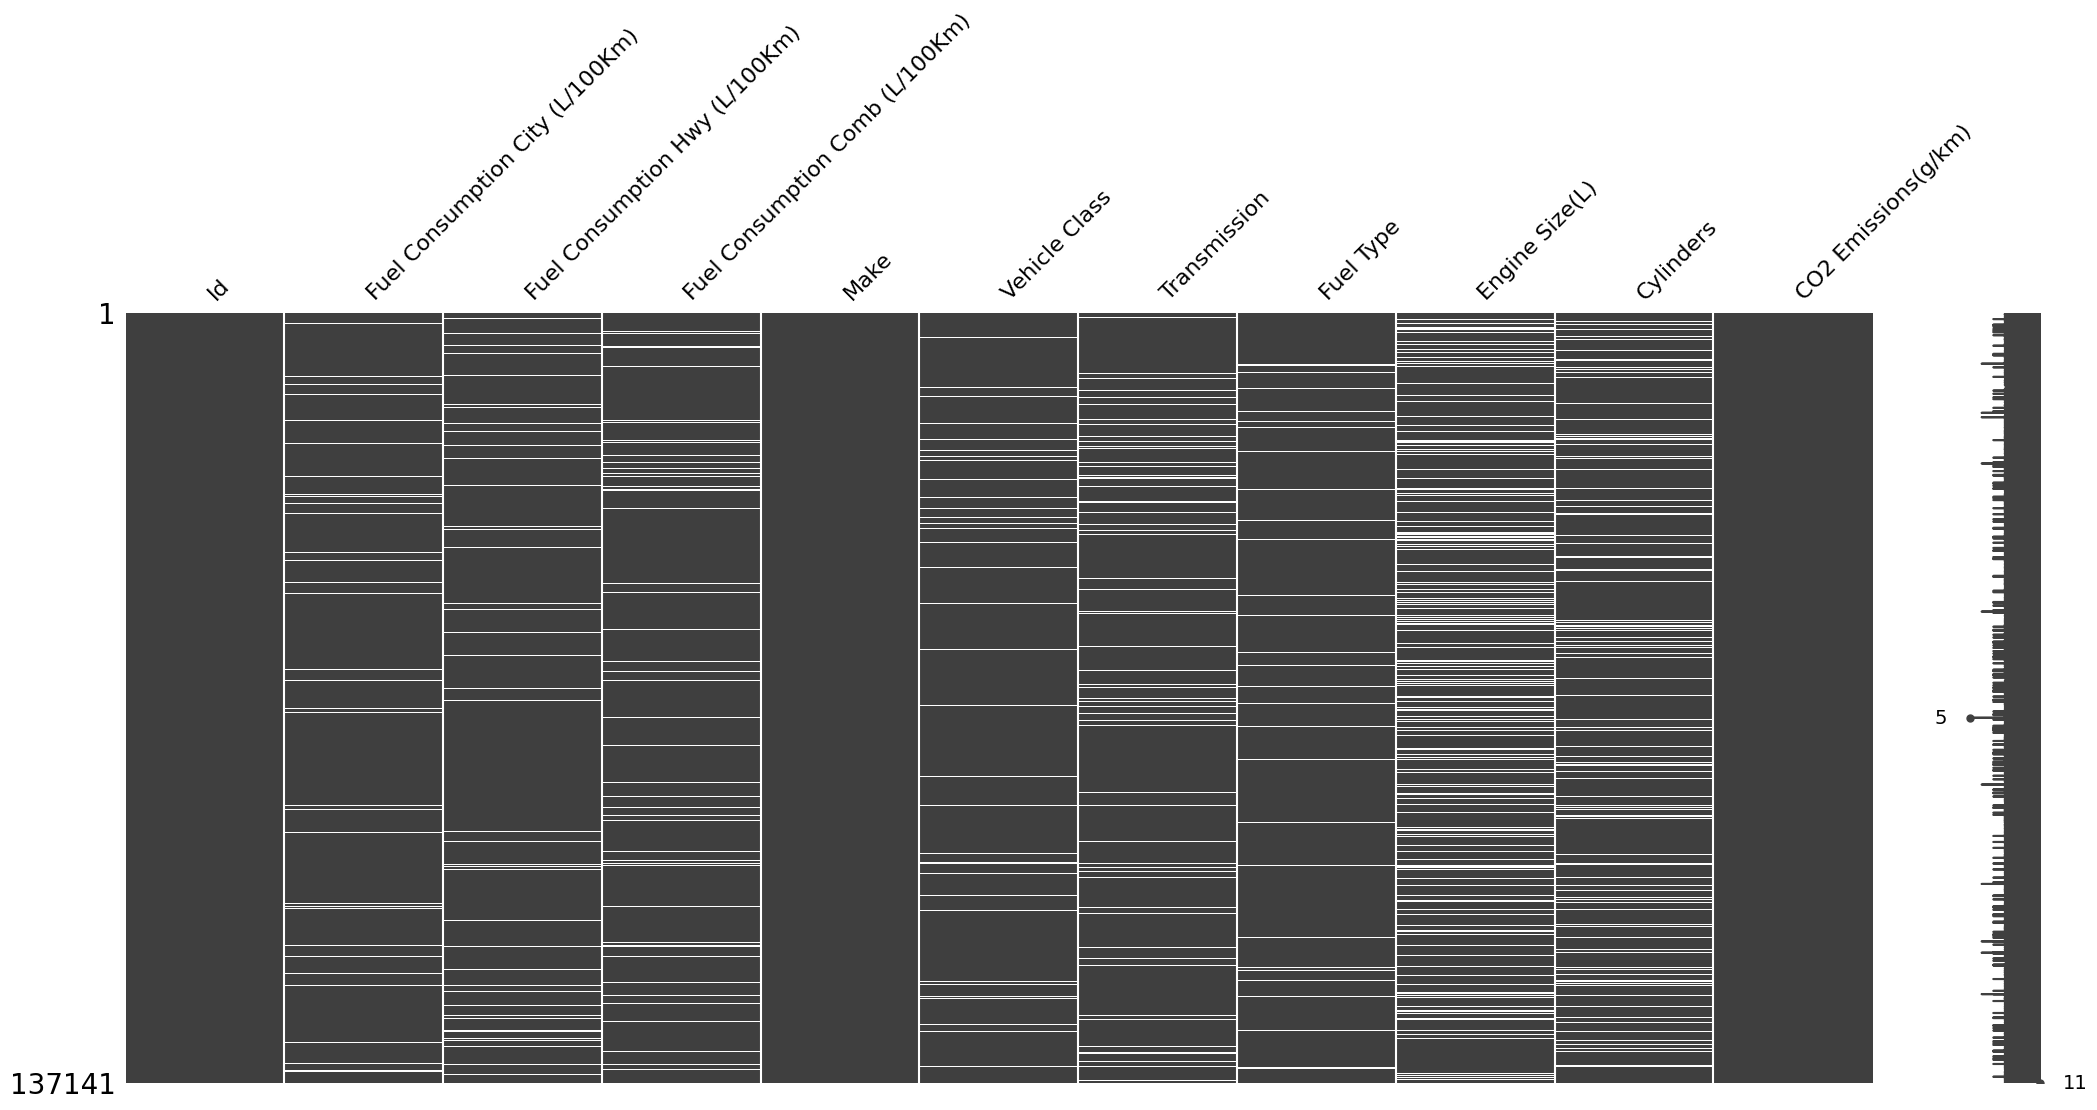

In [42]:
import missingno as msno

msno.matrix(df_all)

In [ ]:
df_all.to_csv('./dataset/train_preprocessed_nooutliers.csv', index=False)

In [13]:
# import numpy as np
# import pandas as pd


# def detect_outliers_zscore(data):
#     outliers = []
#     thres = 3
#     mean = np.mean(data)
#     std = np.std(data)
#     for i in data:
#         z_score = (i - mean) / std
#         if np.abs(z_score) > thres:
#             outliers.append(i)
#     return outliers


# # Iterate over all columns
# for column in df.columns:
#     # Check if column is numeric
#     if np.issubdtype(df[column].dtype, np.number):
#         # Detect outliers
#         outliers = detect_outliers_zscore(df[column])
#         print(f"Outliers in {column}: {len(outliers)}")

Outliers in Fuel Consumption City (L/100Km): 781
Outliers in Fuel Consumption Hwy (L/100Km): 773
Outliers in Fuel Consumption Comb (L/100Km): 673
Outliers in Engine Size(L): 109
Outliers in Cylinders: 666


In [5]:
# # Advanced Methods

# from sklearn.neighbors import LocalOutlierFactor

# clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# y_pred = clf.fit_predict(X)

# from sklearn.ensemble import IsolationForest

# clf = IsolationForest(max_samples=100, random_state=42)
# clf.fit(X)
# y_pred = clf.predict(X)

# from sklearn import svm

# clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
# clf.fit(X)
# y_pred = clf.predict(X)

# from pyod.models.suod import SUOD

# clf = SUOD(base_estimators=None, n_jobs=2, combination="average", verbose=False)
# clf.fit(X)
# y_pred = clf.predict(X)

In [14]:
# import pandas as pd
# from pyod.models.suod import SUOD
# from pyod.models.lof import LOF
# from pyod.models.copod import COPOD
# from pyod.models.iforest import IForest

# # Assuming df is your DataFrame and 'target' is your target column
# # X = df.select_dtypes(include=[np.number])
# X = df_no_missing_values.select_dtypes(include=[np.number])

# # initialized a group of outlier detectors for acceleration
# detector_list = [
#     LOF(n_neighbors=15),
#     LOF(n_neighbors=20),
#     LOF(n_neighbors=25),
#     LOF(n_neighbors=35),
#     COPOD(),
#     IForest(n_estimators=100),
#     IForest(n_estimators=200),
# ]

# # Initialize the model
# clf = SUOD(
#     base_estimators=detector_list, n_jobs=2, combination="average", verbose=False
# )

# # Fit the model
# clf.fit(X)

# # Predict the outliers
# y_pred = clf.predict(X)

# # Add the prediction to your dataframe
# df["outlier"] = y_pred

RandomForestRegressor()



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    5.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:  3.4min finished


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   24.8s finished


In [19]:
# df["outlier"].value_counts()

outlier
0    62900
1     6837
Name: count, dtype: int64

In [20]:
# df_no_outliers = df[df["outlier"] == 0]

In [21]:
# df_no_outliers

,Fuel Consumption City (L/100Km),Fuel Consumption Hwy (L/100Km),Fuel Consumption Comb (L/100Km),Make,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,outlier
0,8.640000,6.140000,7.514791,FOLD,PICKUP TRUCK - STANDARD,A6,X,3.5,6.0,0
6,7.520000,19.138279,12.750000,GONDA,FULL-SIZE,AV7,X,1.8,4.0,0
7,8.238689,2.060000,5.455537,LAND CRAWLER,SUV - SMALL,AS8,Z,2.0,4.0,0
11,19.010000,8.541911,14.306152,BMV,SUBCOMPACT,M6,Z,3.0,6.0,0
12,2.200000,5.300000,3.579098,TOYOTI,MINIVAN,AS6,X,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...
137131,23.160000,16.830000,20.300000,NIRRAN,SPECIAL PURPOSE VEHICLE,AV,X,2.0,4.0,0
137134,17.750000,0.530000,10.000000,GONDA,MID-SIZE,M6,X,3.5,6.0,0
137137,6.489293,0.870000,3.961175,GONDA,STATION WAGON - SMALL,M6,X,1.5,4.0,0
137138,2.990000,8.380000,5.412550,NIRRAN,MID-SIZE,AV,X,1.8,4.0,0


Outliers in Fuel Consumption City (L/100Km): 99


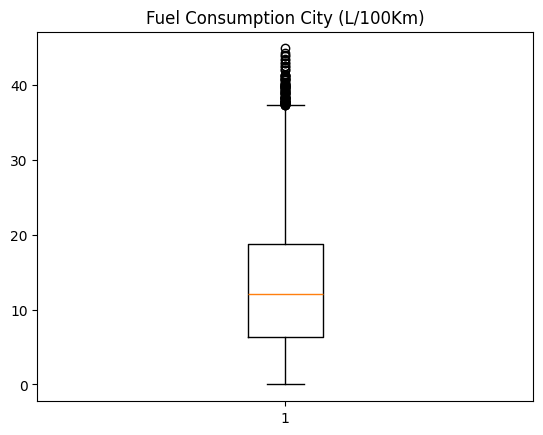

Outliers in Fuel Consumption Hwy (L/100Km): 312


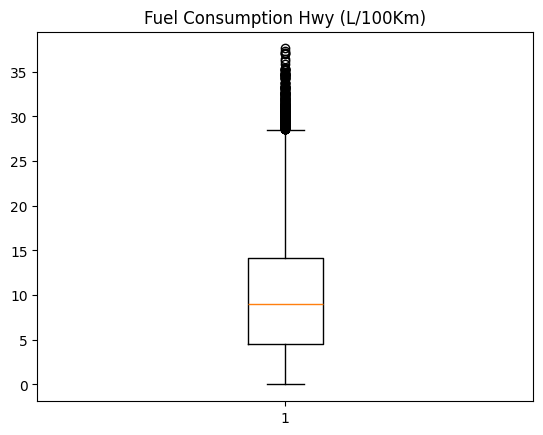

Outliers in Fuel Consumption Comb (L/100Km): 124


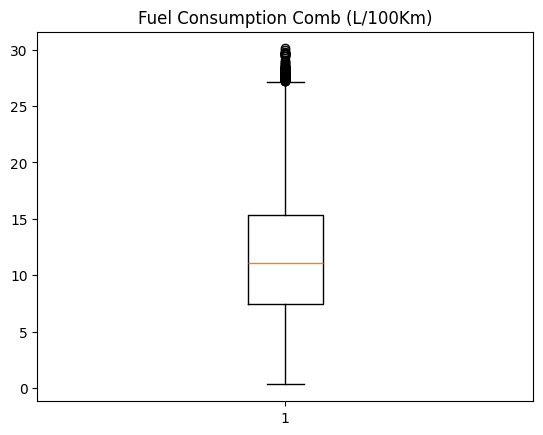

Outliers in Engine Size(L): 892


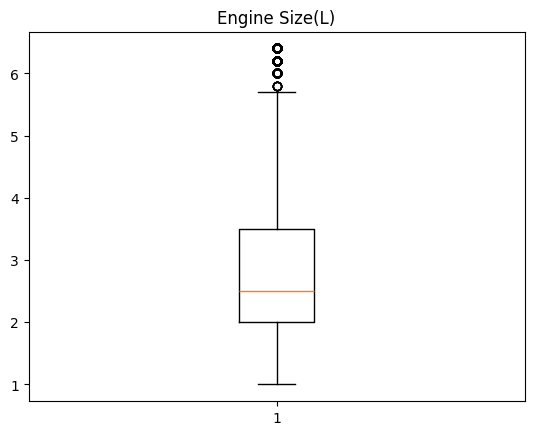

Outliers in Cylinders: 39


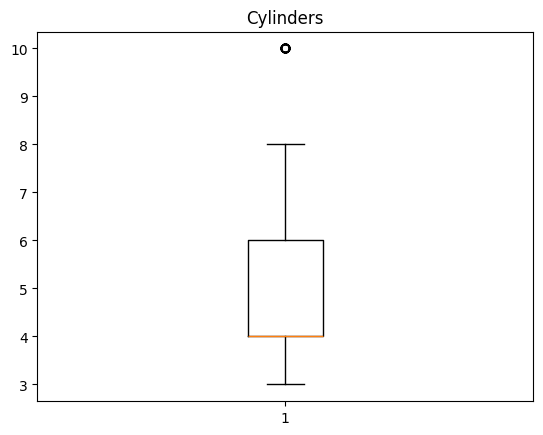

Outliers in outlier: 0


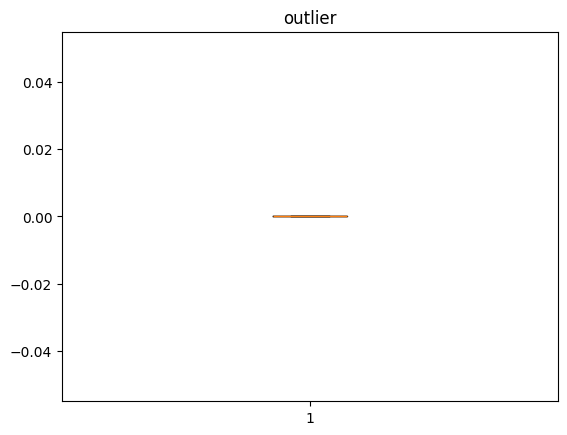

In [22]:
# # Iterate over all columns
# for column in df_no_outliers.columns:
#     # Check if column is numeric
#     if np.issubdtype(df_no_outliers[column].dtype, np.number):
#         # Detect outliers
#         outliers = detect_outliers_iqr(df_no_outliers[column])
#         print(f"Outliers in {column}: {len(outliers)}")

#         # Create a new figure
#         plt.figure()

#         # Create a box plot of the column
#         plt.boxplot(df_no_outliers[column].dropna())

#         # Set the title to the column name
#         plt.title(column)

#         # Show the plot
#         plt.show()